<a href="https://www.kaggle.com/code/soumikniloy/covid-cell-detection?scriptVersionId=134702711" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Set the path to the dataset
dataset_path = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19"

In [3]:
# Set the path to the train and test directories
train_dir = os.path.join(dataset_path, "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train")
test_dir = os.path.join(dataset_path, "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test")

In [4]:
# Set the image dimensions
img_width, img_height = 224, 224

In [5]:
# Set the batch size
batch_size = 32

In [6]:
# Create the train and test data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:

# Train the model
epochs = 10

model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs
)

Epoch 1/10
4/4 [==============================] - 12s 3s/step - loss: 0.9708 - accuracy: 0.5086
Epoch 2/10
4/4 [==============================] - 10s 2s/step - loss: 0.7027 - accuracy: 0.5086
Epoch 3/10
4/4 [==============================] - 10s 2s/step - loss: 0.6743 - accuracy: 0.6466
Epoch 4/10
4/4 [==============================] - 10s 2s/step - loss: 0.6210 - accuracy: 0.5234
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 0.4694 - accuracy: 0.8621
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 0.3253 - accuracy: 0.8621
Epoch 7/10
4/4 [==============================] - 10s 3s/step - loss: 0.1829 - accuracy: 0.9224
Epoch 8/10
4/4 [==============================] - 11s 3s/step - loss: 0.2351 - accuracy: 0.9297
Epoch 9/10
4/4 [==============================] - 10s 2s/step - loss: 0.2929 - accuracy: 0.8534
Epoch 10/10
4/4 [==============================] - 10s 2s/step - loss: 0.3784 - accuracy: 0.8534


In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(
    test_generator,
    steps=test_generator.n // batch_size
)

1/1 [==============================] - 2s 2s/step - loss: 0.1158 - accuracy: 1.0000


In [11]:
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.11578094959259033
Test Accuracy: 1.0


In [12]:
from tensorflow.keras.preprocessing import image

In [13]:
# Set the path to the input image from the test data
input_image_path = "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg"

# Load and preprocess the input image
img = image.load_img(input_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = img_array / 255.0  # Normalize the pixel values

In [14]:
# Make predictions on the preprocessed input image
predictions = model.predict(preprocessed_img)
predicted_label = "Pneumonia" if predictions[0] > 0.5 else "Normal"
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 168ms/step
Predicted Label: Pneumonia


In [15]:

# Get the true labels for the test set
y_true = test_generator.classes

In [16]:
# Predict the labels for the test set
y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(y_pred, axis=1)

/tmp/ipykernel_20/3975643752.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

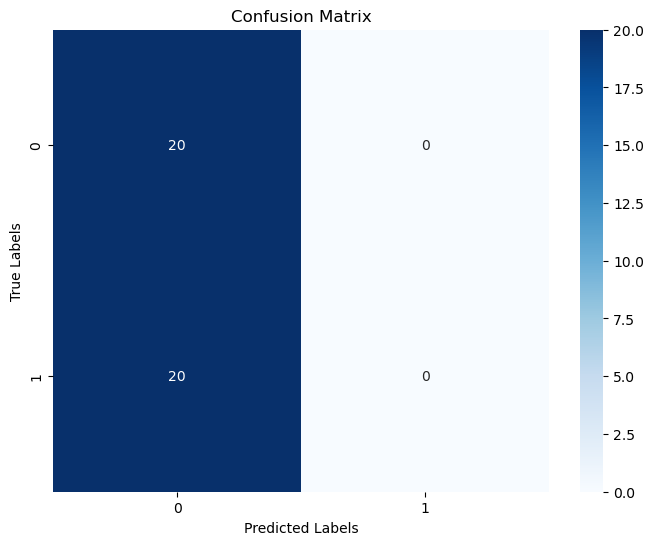

In [20]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()